In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

# contains the dera data from https://www.sec.gov/dera/data/financial-statement-data-sets
data_dir = Path("../data/2023q1")
num_df = pd.read_csv(data_dir / "num.txt", sep="\t")
sub_df = pd.read_csv(data_dir / "sub.txt", sep="\t")
pre_df = pd.read_csv(data_dir / "pre.txt", sep="\t")
tag_df = pd.read_csv(data_dir / "tag.txt", sep="\t")

In [3]:
tag_df.head(5)

,tag,version,custom,abstract,datatype,iord,crdr,tlabel,doc
0,AccountingStandardsUpdate201613Member,us-gaap/2021,0,1,member,NaN,NaN,Accounting Standards Update 2016-13 [Member],Accounting Standards Update 2016-13 Financial ...
1,AccountingStandardsUpdate201409Member,us-gaap/2021,0,1,member,NaN,NaN,Accounting Standards Update 2014-09 [Member],Accounting Standards Update 2014-09 Revenue fr...
2,StatementTable,us-gaap/2021,0,1,NaN,NaN,NaN,Statement [Table],"Schedule reflecting a Statement of Income, Sta..."
3,SecurityExchangeName,dei/2021,0,0,edgarExchangeCode,D,NaN,Security Exchange Name,Name of the Exchange on which a security is re...
4,LocalPhoneNumber,dei/2021,0,0,normalizedString,D,NaN,Local Phone Number,Local phone number for entity.


In [5]:
print(num_df.shape)
num_df.columns

(3293693, 9)


Index(['adsh', 'tag', 'version', 'coreg', 'ddate', 'qtrs', 'uom', 'value',
       'footnote'],
      dtype='object')

In [24]:
sub_df.columns

Index(['adsh', 'cik', 'name', 'sic', 'countryba', 'stprba', 'cityba', 'zipba',
       'bas1', 'bas2', 'baph', 'countryma', 'stprma', 'cityma', 'zipma',
       'mas1', 'mas2', 'countryinc', 'stprinc', 'ein', 'former', 'changed',
       'afs', 'wksi', 'fye', 'form', 'period', 'fy', 'fp', 'filed', 'accepted',
       'prevrpt', 'detail', 'instance', 'nciks', 'aciks'],
      dtype='object')

In [25]:
pre_df.columns

Index(['adsh', 'report', 'line', 'stmt', 'inpth', 'rfile', 'tag', 'version',
       'plabel', 'negating'],
      dtype='object')

In [26]:
tag_df.columns

Index(['tag', 'version', 'custom', 'abstract', 'datatype', 'iord', 'crdr',
       'tlabel', 'doc'],
      dtype='object')

In [6]:
num_df.adsh.nunique()

8084

In [7]:
num_df.iloc[0].adsh

'0001193125-23-031180'

In [13]:
example_adsh = "0001193125-23-031180"
sub_df[sub_df.adsh == example_adsh].cik.value_counts()

1070304    1
Name: cik, dtype: int64

In [14]:
cik = "1070304"
sub_df[sub_df.adsh == example_adsh].instance.value_counts()

d307748d6k_htm.xml    1
Name: instance, dtype: int64

In [18]:
# url_base = "http://www.sec.gov/Archives/edgar/data/"
pre_df.head(1)

,adsh,report,line,stmt,inpth,rfile,tag,version,plabel,negating
0,0001023459-23-000011,2,10,BS,0,H,AccountsReceivableNetCurrent,us-gaap/2021,"Accounts receivable, net of allowance for doub...",0


In [20]:
sub_df.columns

Index(['adsh', 'cik', 'name', 'sic', 'countryba', 'stprba', 'cityba', 'zipba',
       'bas1', 'bas2', 'baph', 'countryma', 'stprma', 'cityma', 'zipma',
       'mas1', 'mas2', 'countryinc', 'stprinc', 'ein', 'former', 'changed',
       'afs', 'wksi', 'fye', 'form', 'period', 'fy', 'fp', 'filed', 'accepted',
       'prevrpt', 'detail', 'instance', 'nciks', 'aciks'],
      dtype='object')

In [22]:
sub_df.head(1)[["adsh", "name", "cik", "aciks", "instance"]]

,adsh,name,cik,aciks,instance
0,0000004457-23-000026,U-HAUL HOLDING CO /NV/,4457,NaN,uhal-20230323_htm.xml


In [23]:
tmp = "http://www.sec.gov/Archives/edgar/data/4457/000000445723000026/uhal-20230323_htm.xml"
sub_df[sub_df.adsh == "0000004457-23-000026"]

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000004457-23-000026,4457,U-HAUL HOLDING CO /NV/,7510.0,US,NV,RENO,89511,5555 KIETZKE LANE STE 100,NaN,...,20230331.0,NaN,NaN,20230329,2023-03-29 16:05:00.0,0,0,uhal-20230323_htm.xml,1,NaN


In [27]:
pre_df.iloc[0][["inpth", "rfile"]]

inpth    0
rfile    H
Name: 0, dtype: object

In [28]:
tag_df.iloc[0]

tag                     AccountingStandardsUpdate201613Member
version                                          us-gaap/2021
custom                                                      0
abstract                                                    1
datatype                                               member
iord                                                      NaN
crdr                                                      NaN
tlabel           Accounting Standards Update 2016-13 [Member]
doc         Accounting Standards Update 2016-13 Financial ...
Name: 0, dtype: object

In [31]:
sub_df.instance.value_counts()

form8-k_htm.xml             1183
form10-k_htm.xml             253
form10-q_htm.xml             111
form8k_htm.xml               106
form8-ka_htm.xml              54
                            ... 
uone-20230308x8k_htm.xml       1
adap-20230310x8k_htm.xml       1
agx-20230307x8k_htm.xml        1
dlr-20230306x8k_htm.xml        1
rivn-20230103_htm.xml          1
Name: instance, Length: 22888, dtype: int64

Need to create document url correctly. Example - "https://www.sec.gov/Archives/edgar/data/4457/000000445723000026/uhal-20230323.htm" - for the `instance` column, you need to split on `_` and then just do `.htm`

In [36]:
sub_df[sub_df.adsh == "0000004457-23-000026"][["cityma", "name"]]

,cityma,name
0,RENO,U-HAUL HOLDING CO /NV/


In [38]:
sub_num = sub_df[sub_df.adsh.isin(num_df.adsh)]
sub_num.shape

(8084, 36)

In [64]:
sub_num.head(3)

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
1,0000005272-23-000014,5272,"AMERICAN INTERNATIONAL GROUP, INC.",6331.0,US,NY,NEW YORK,10020-1304,1271 AVE OF THE AMERICAS,FL 37,...,NaN,NaN,NaN,20230329,2023-03-29 16:44:00.0,0,0,aig-20230329_htm.xml,1,NaN
5,0000072162-23-000015,72162,NL INDUSTRIES INC,2810.0,US,TX,DALLAS,75240-2620,5430 LBJ FREEWAY,SUITE 1700,...,NaN,NaN,NaN,20230329,2023-03-29 16:17:00.0,0,0,nl-20230518xdef14a_htm.xml,1,NaN
9,0000109198-23-000004,109198,TJX COMPANIES INC /DE/,5651.0,US,MA,FRAMINGHAM,01701,770 COCHITUATE RD,NaN,...,20230131.0,2022.0,FY,20230329,2023-03-29 11:39:00.0,0,1,tjx-20230128_htm.xml,1,NaN


In [66]:
example_adsh = "0000109198-23-000004"
num_df[num_df.adsh == example_adsh]

,adsh,tag,version,coreg,ddate,qtrs,uom,value,footnote
155985,0000109198-23-000004,EntityCommonStockSharesOutstanding,dei/2022,NaN,20230331,0,shares,1.152569e+09,NaN
159564,0000109198-23-000004,EntityPublicFloat,dei/2022,NaN,20220731,0,USD,7.100000e+10,NaN
167735,0000109198-23-000004,AccountsPayableCurrent,us-gaap/2022,NaN,20230131,0,USD,3.794000e+09,NaN
167736,0000109198-23-000004,AccountsPayableCurrent,us-gaap/2022,NaN,20220131,0,USD,4.465000e+09,NaN
183364,0000109198-23-000004,AccountsReceivableNetCurrent,us-gaap/2022,NaN,20230131,0,USD,5.630000e+08,NaN
...,...,...,...,...,...,...,...,...,...
3217766,0000109198-23-000004,UnrecognizedTaxBenefitsNetOfFederalTaxBenefit,0000109198-23-000004,NaN,20220131,0,USD,2.880000e+08,NaN
3217767,0000109198-23-000004,UnrecognizedTaxBenefitsNetOfFederalTaxBenefit,0000109198-23-000004,NaN,20210131,0,USD,2.720000e+08,NaN
3217768,0000109198-23-000004,VariableAndShortTermLeaseCost,0000109198-23-000004,NaN,20230131,4,USD,1.359000e+09,NaN
3217769,0000109198-23-000004,VariableAndShortTermLeaseCost,0000109198-23-000004,NaN,20220131,4,USD,1.386000e+09,NaN


In [70]:
num_df[num_df.tag == "UnrecognizedTaxBenefitsThatWouldImpactDeferredTaxLiabilities"]


,adsh,tag,version,coreg,ddate,qtrs,uom,value,footnote
2983863,0001564590-23-002740,UnrecognizedTaxBenefitsThatWouldImpactDeferred...,0001564590-23-002740,NaN,20221231,0,USD,11800000.0,NaN


In [54]:
sub_df[sub_df.adsh == example_adsh]

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
1,0000005272-23-000014,5272,"AMERICAN INTERNATIONAL GROUP, INC.",6331.0,US,NY,NEW YORK,10020-1304,1271 AVE OF THE AMERICAS,FL 37,...,NaN,NaN,NaN,20230329,2023-03-29 16:44:00.0,0,0,aig-20230329_htm.xml,1,NaN


In [58]:
tag_df[(tag_df.tag == "NetIncomeLoss") & (tag_df.version == "us-gaap/2022")].iloc[0]["doc"]

'The portion of profit or loss for the period, net of income taxes, which is attributable to the parent.'

In [46]:
print(tag_df.columns)
sub_num.adsh.value_counts()

Index(['tag', 'version', 'custom', 'abstract', 'datatype', 'iord', 'crdr',
       'tlabel', 'doc'],
      dtype='object')


0000005272-23-000014    1
0000034067-23-000033    1
0000764622-23-000023    1
0000764180-23-000020    1
0000717423-23-000015    1
                       ..
0001178913-23-001057    1
0001178913-23-001049    1
0001178913-23-001041    1
0001174947-23-000382    1
0001628280-23-000100    1
Name: adsh, Length: 8084, dtype: int64

In [47]:
print(tag_df.tag.value_counts())
print(tag_df.iord.value_counts())

IncreaseDecreaseInOperatingLeaseLiabilities                256
TemporaryEquityStockIssuedDuringPeriodSharesNewIssues      185
StockIssuedDuringPeriodSharesWarrantsExercised             177
StockIssuedDuringPeriodValueWarrantsExercised              161
NonCashLeaseExpense                                        129
                                                          ... 
CreditResolutionExpense                                      1
DebtSecuritiesHeldToMaturityNetOfAllowanceForCreditLoss      1
DebtSecuritiesAvailableForSalePurchasedButNotYetPaid         1
CorporateDevelopmentCosts                                    1
StockIssuedDuringPeriodValueStockBasedPayments               1
Name: tag, Length: 98979, dtype: int64
D    89499
I    17039
Name: iord, dtype: int64


In [48]:
tag_df.tlabel.value_counts()

Increase Decrease In Operating Lease Liabilities                                                                                      132
Temporary Equity, Stock Issued During Period, Shares, New Issues                                                                      107
Stock Issued During Period, Shares, Warrants Exercised                                                                                103
Series A Convertible Preferred Stock [Member]                                                                                          91
Common Stock Value1                                                                                                                    90
                                                                                                                                     ... 
Current portion of non-current credit facilities, notes and bonds received                                                              1
Current credits and other receivab

In [51]:
sub_num.form.nunique()

42

In [52]:
pre_df.columns

Index(['adsh', 'report', 'line', 'stmt', 'inpth', 'rfile', 'tag', 'version',
       'plabel', 'negating'],
      dtype='object')

In [62]:
num_df.adsh.nunique()

8084

In [63]:
tag_df.tag.nunique()

98979

KeyboardInterrupt: 

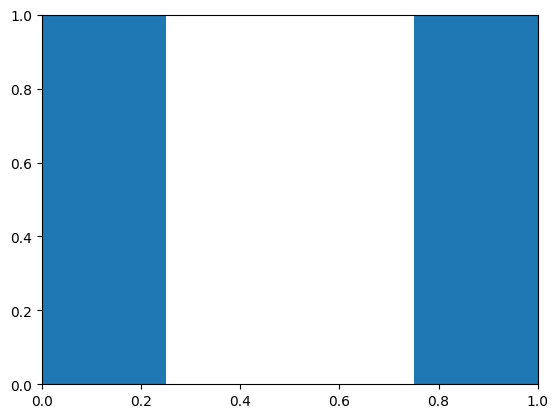

In [73]:
tag_df.tag.value_counts().plot.bar(kind="bar")

In [4]:
%env MAGICK_HOME=/opt/homebrew/opt/imagemagick

env: MAGICK_HOME=/opt/homebrew/opt/imagemagick


In [5]:
import os
os.environ.get("MAGICK_HOME")

'/opt/homebrew/opt/imagemagick'

In [8]:
from PIL import Image
from notebooks.sec_exploration.scratch import convert_to_tiff
aig_report = "aig-20230329"
pdf_path = data_dir / f"{aig_report}.pdf"
tif_path = data_dir / f"{aig_report}.tif"

convert_to_tiff(pdf_path, tif_path)


: 

: 